# Plot ANHA4 variables

This notebook contains examples of visualizing ANHA4 variables in the north pole. Created for and by CCAR Modeling Group.

# Content
1. [**Basemap set-up in the Arctic**](#Basemap-set-up-in-the-Arctic)
1. [**Scalar field examples**](#Scalar-field-examples)
1. [**Vector field examples**](#Vector-field-examples)
  2. [Example I: quiver](#Example-I:-quiver)
  2. [Example II: streamplot](#Example-II:-streamplot)

In [3]:
__author__ = "Yingkai (Kyle) Sha"
__email__ = "yingkai@eos.ubc.ca"

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

The longitude and latitude arrays are given by `coordinates_ANHA4.nc` in ANHA4 experiments.

We will use fake scalar and vector fields as examples. 

In [10]:
# import ANHA4 coordinate file, export file object 
nc_obj = nc.Dataset('coordinates_ANHA4.nc', 'r', format="NETCDF4")
print('Display all nc variables: {}'.format(nc_obj.variables.keys()))

Display all nc variables: [u'nav_lon', u'nav_lat', u'glamt', u'glamu', u'glamv', u'glamf', u'gphit', u'gphiu', u'gphiv', u'gphif', u'e1t', u'e1u', u'e1v', u'e1f', u'e2t', u'e2u', u'e2v', u'e2f']


In [51]:
# import nc variables
nav_lon = nc_obj.variables['nav_lon'][:]
nav_lat = nc_obj.variables['nav_lat'][:]

# Basemap set-up in the Arctic

Stereographic and Orthographic projections are typical choices for showing data in the north pole.

In the following, we mainly use Stereographic.

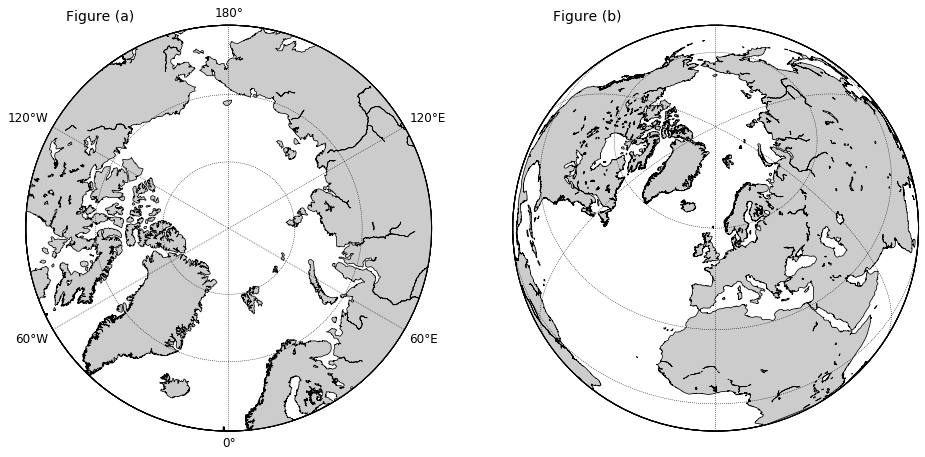

In [45]:
# Specify figure size as inches
fig = plt.figure(figsize=(16, 8))
# Divide space by grids (row_num, col_num), (start_row, start_col)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
# Define sub-titles 
ax1.set_title('Figure (a)', loc='left', x=0.1, fontsize=14)
ax2.set_title('Figure (b)', loc='left', x=0.1, fontsize=14)
# ============================ Figure (a) ============================ #
# Basemap Stereographic Proj. set-up in the north pole
#     resolution = 'c'<'l'<'i'<'h'<'f'
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax1)
# Draw meridians, labels=[left, right, top, bottom]
proj.drawmeridians(np.array([0, 60, 120, 180, 240, 300]), labels=[1, 1, 1, 1], fontsize=12, latmax=90, linewidth=0.5)
# Draw parallels
proj.drawparallels(np.array([70, 80, 90]), labels=[0, 0, 0, 0], latmax=90, linewidth=0.5)
# Fill continents
proj.fillcontinents(color=[0.8, 0.8, 0.8], lake_color=None); # <-- ";" Suppress the print-out of polygon objects
# Draw coastlines
proj.drawcoastlines(linewidth=0.75, color='k')
# ============================ Figure (b) ============================ #
# Basemap Orthographic Proj. set-up
proj=Basemap(projection='ortho', resolution='l', lat_0=60, lon_0=0, round=True, ax=ax2)
proj.drawmeridians(np.array([0, 60, 120, 180, 240, 300]), labels=[0, 0, 0, 0], latmax=90, linewidth=0.5)
proj.drawparallels(np.arange(-90, 90+30, 30), labels=[0, 0, 0, 0], latmax=90, linewidth=0.5)
proj.fillcontinents(color=[0.8, 0.8, 0.8], lake_color=None);
proj.drawcoastlines(linewidth=0.75, color='k')

# Scalar field examples

Here create fake scale field.

In [147]:
# Create fake scalar field
T = np.zeros(nav_lon.shape); count = 1
for i in np.arange(70, 90+5, 5):
    T[nav_lat>i] += count
T -= 2

Contour plot (pseudocolor and hexbin plot can be make in a similar way)

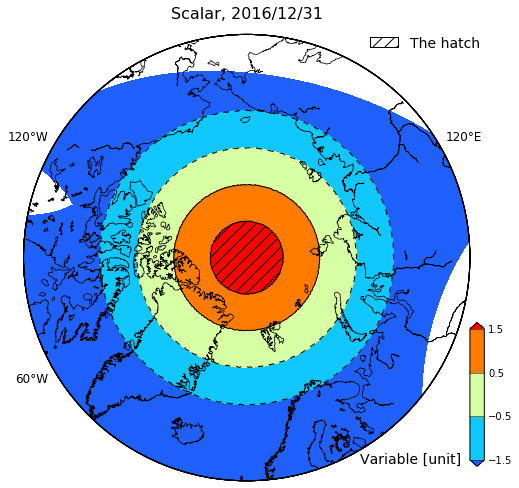

In [161]:
# Contour levels
lev = [-1.5, -0.5, 0.5, 1.5]
fig = plt.figure(figsize=(8, 8))
# Get current axis
ax = fig.gca()
ax.set_title('Scalar, 2016/12/31', y=1.025, fontsize=16)
# Projection set-up
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.array([120, 240, 300]), labels=[1, 1, 1, 1], fontsize=12, latmax=90, linewidth=0)
proj.drawcoastlines(linewidth=0.75, color='k')
# Covert lats/lons to distance
x, y = proj(nav_lon, nav_lat)
# Filled contour patterns, export graphic handel
#     cmap = your colormnap
#     extend = colorbar type; 'min', 'max', 'both'
CS = proj.contourf(x, y, T, lev, cmap=cm.GMT_no_green, extend='both')
# Add contours
#     keywords = line object keyword + "s"   
proj.contour(x, y, T, lev, colors=('k',), linewidths=1.0)
# Specific contour for hatches
#     hatches = [' ', '////', '\\\\', '+++', '..', '*']
CS_hatch = proj.contourf(x, y, T, [1.5, 2], hatches=['//', ' '], colors='none')

# ============================ Legend of the hatch ============================ #
# Export hatch pattern
artists, _ = CS_hatch.legend_elements()
# Define words in the legend
labels = ['The hatch']
# Create legend
#     bbox_to_anchor = (loc_x, loc_y)
#     prop = {plt.text keywords as dict}
LG = ax.legend(artists, labels, bbox_to_anchor=(1.05, 1.025), prop={'size':14})
# Turn the box off
LG.draw_frame(False)

# ============================ Matplotlib colorbar set-up ============================ #
# Define space for colorbar, fig.add_axes([loc_x, loc_y, width, height]) 
cax = fig.add_axes([0.9, 0.15, 0.025, 0.25])
# Create colorbar, specify colorbar axis as "cax"
CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
# Colorbar label, accept plt.text keywords
CBar.set_label('Variable [unit]', labelpad=-102, y=0.1, fontsize=14, rotation=0)
# Set colorbar ticks
CBar.set_ticks(lev); CBar.ax.tick_params(axis='y', length=15)

# Vector field examples

Here create fake vector field.

In [204]:
# Create fake vector field
U = 5*np.ones(nav_lon.shape)
for i in np.arange(70, 90+5, 5):
    U[nav_lat>i] -= 1
V = 0.5*np.ones(nav_lon.shape)

Interpolate all vector components from ANHA4 grid to rectilinear grid.

This improves the display quality.

In [205]:
def interp_np(nav_lon, nav_lat, var_in, gridx, gridy):
    ''' Interpolate ANHA4 variable onto Mercator (rectilinear) grid.
        The function is based on the bilinear interpolation in scipy, griddata 
        =======================================================================
            nav_lon, nav_lat: ANHA4 lons/lats
            gridx, gridy    : User defined lons/lats
            var_in          : 2-D ANHA4 variable
    '''
    from scipy.interpolate import griddata

    LatLonPair = (nav_lon.flatten(), nav_lat.flatten())
    var_out = griddata(LatLonPair, var_in.flatten(), (gridx, gridy), method='linear')
    # Take nearest neighbour interpolation to fill nans
    var_fill = griddata(LatLonPair, var_in.flatten(), (gridx, gridy), method='nearest')
    var_out[np.isnan(var_out)] = var_fill[np.isnan(var_out)]
    return var_out

In [206]:
# Create rectilinear grid
ocean_x = np.linspace(-180, 180, 140)
ocean_y = np.linspace(20, 90, 140)
gridx, gridy = np.meshgrid(ocean_x, ocean_y)
# Convert nans to zero (optional) 
U_interp = np.copy(U); U_interp[np.isnan(U_interp)] = 0
V_interp = np.copy(V); V_interp[np.isnan(V_interp)] = 0
# interpolate to rectilinear
Ugrid = interp_np(nav_lon, nav_lat, U, gridx, gridy)
Vgrid = interp_np(nav_lon, nav_lat, V, gridx, gridy)

Mask out all the grids in land after interpolation (optional for oceanic variables) 

In [190]:
def find_inland(lon, lat, res='l'):
    '''
    Detect data points located in land
    Based on Basemap's GSHHS dataset.
    -------------------------------------------
    res = 'c' --> 'f'
    result = 1 --> land
           = 0 --> ocean/lake/river
    Designed for lon = [-180, 180]
    '''
    from matplotlib.path import Path
    result = np.empty(lon.shape)
    proj = Basemap(projection='cyl', resolution=res)
    for i in range(np.size(lon, 0)):
        x, y = proj(lon[i, :], lat[i, :])
        locations = np.c_[x, y]
        polygons = [Path(p.boundary) for p in proj.landpolygons]
        row_result = np.zeros(len(locations), dtype=bool) 
        for polygon in polygons:
            row_result += np.array(polygon.contains_points(locations))
        result[i, :] = row_result
    return result

In [209]:
# Get land mask
land_mask = find_inland(gridx, gridy)
# Show 
Ugrid[land_mask==1]=np.nan
Vgrid[land_mask==1]=np.nan

## Example I: quiver

Show the vector field as arrows.

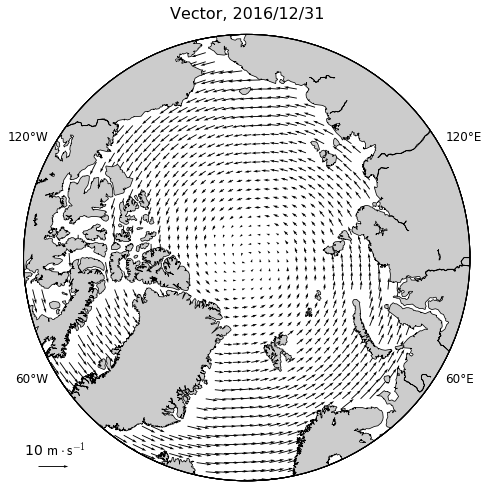

In [210]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_title('Vector, 2016/12/31', y=1.025, fontsize=16)
# Projection set-up
proj=Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.array([60, 120, 240, 300]), labels=[1, 1, 1, 1], fontsize=12, latmax=90, linewidth=0)
proj.fillcontinents(color=[0.8, 0.8, 0.8], lake_color=None);
proj.drawcoastlines(linewidth=0.75, color='k')
x, y = proj(nav_lon, nav_lat)
# Rotate vector (a must if "north" and "upware" are not consistent)
uproj, vproj = proj.rotate_vector(Ugrid, Vgrid, gridx, gridy, returnxy=False)
# Interpolate, make u, v equally distributed in the map (optional)
uproj_rec, x, y = proj.transform_scalar(uproj, ocean_x, ocean_y, 50, 50, returnxy=True)
vproj_rec, _, _ = proj.transform_scalar(vproj, ocean_x, ocean_y, 50, 50, returnxy=True)
# PLot as quiver, export handle, keywords see the example
Q = proj.quiver(x, y, uproj_rec, vproj_rec, width=0.002, headwidth=3, scale=150, color='k')
# Show Quiver label (handle, x, y, label_length, text, keywords)
qk = plt.quiverkey(Q, 0.15, 0.15, 10, '\t10 $\mathsf{m\cdot s^{-1}}$', \
                   labelpos='N', coordinates='figure', fontproperties={'size': 14})

## Example II: streamplot

Show the vector field as streamlines.

Note: If a streamline is "short", then it will not be shown. Do not mask in land grids after interpolation if you need to show details in CAA. 

In [220]:
import cartopy
# cartopy is another mapping module, it is incorporated into the matplotlib axis. 
# here cartopy is used to make the axis as a "circle" and make sure no data exceeds
# the Basemap "boundinglat".
# ---------------------------------------------------------------------------------
# conda install -c scitools cartopy

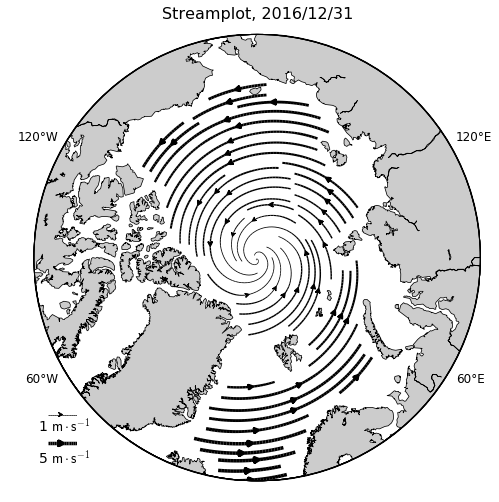

In [243]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_title('Streamplot, 2016/12/31', y=1.025, fontsize=16)
# ============================ Cartopy set-up ============================
# Make a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# Draw the circle as the map frame 
# (optional since Basemap also draws the frame, but here you can set linewidth etc.)
patch = patches.PathPatch(circle, lw=2)
ax.add_patch(patch)
# Cartopy axis set-up. "NorthPolarStereo" = Basemap "npstere"  
ax_proj = fig.gca(projection=cartopy.crs.NorthPolarStereo(0))
# Set the axis extend, [lon_0, lon_1, lat_0, lat_1]
# lat_0 should consistent with Basemap "boundinglat"
ax_proj.set_extent([-180, 180, 65, 90], cartopy.crs.PlateCarree())
ax_proj.set_boundary(circle, transform=ax_proj.transAxes)
# Turn the box off
ax.axis('off')
# ============================ Basemap set-up ============================
# Basemap.streamplot does not work with "round=True". 
# So here we defined "proj" and "proj_fake".
# "proj" has "round=False" and will be holding the streamplot.
# "proj_fake" has "round=True" and other map elements, act as a cover.
# ------------------------------------------------------------------------
# the fake
proj_fake=Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax_proj)
proj_fake.drawmeridians(np.array([60, 120, 240, 300]), labels=[1, 1, 1, 1], fontsize=12, latmax=90, linewidth=0)
proj_fake.fillcontinents(color=[0.8, 0.8, 0.8], lake_color=None);
proj_fake.drawcoastlines(linewidth=0.75, color='k')
# the real 
proj=Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=False, ax=ax_proj)
x, y = proj(nav_lon, nav_lat)
# Rotate & interpolate vectors
uproj, vproj = proj.rotate_vector(Ugrid, Vgrid, gridx, gridy, returnxy=False)
uproj_rec, x, y = proj.transform_scalar(uproj, ocean_x, ocean_y, 100, 100, returnxy=True)
vproj_rec, _, _ = proj.transform_scalar(vproj, ocean_x, ocean_y, 100, 100, returnxy=True)

# Streamplot with linewidth indicates the speed.
# ----------------------------------------------
# Calculate speed
speed = np.sqrt(uproj_rec**2 + vproj_rec**2)
# Define linewidth array by the speed
lw = 3.5*speed/np.nanmax(speed)
# Draw the streamplot
proj.streamplot(x, y, uproj_rec, vproj_rec, density=[5, 1.5], linewidth=lw, 
                color='k', arrowstyle='fancy', arrowsize=1.0)

# ============================ Streamplot legend ============================
# Streamplot's "offical" legend is bad, here is a user-defined version
# ---------------------------------------------------------------------------
# 1m/s legend
mark_spd = 1
# creat fake x, y, u, v field
lgd_x, lgd_y = np.meshgrid(np.linspace(0, 1, 2), np.linspace(0, 1, 2))
lgd_u = np.ones([2, 2])*mark_spd
lgd_v = np.zeros([2, 2])
# add a small axis for legend
legend_ax1 = fig.add_axes([0.15, 0.225, 0.05, 0.03])
# An extra streamplot to show the 1m/s,
#     the parameter (3.5) and "arrowsize" should consistent with the above.
legend_ax1.streamplot(lgd_x, lgd_y, lgd_u, lgd_v, color='k', 
                     linewidth=3.5*mark_spd/np.nanmax(speed), arrowstyle='fancy', arrowsize=1.0)
# Adjust ylim to make the legend and the center
legend_ax1.set_ylim([-0.01, 0.01])
# Hide the axis
legend_ax1.axis('off')
# ---------------------------------------------------------------------------
# 5m/s legend
mark_spd = 5
lgd_u = np.ones([2, 2])*mark_spd
lgd_v = np.zeros([2, 2])
legend_ax2 = fig.add_axes([0.15, 0.175, 0.05, 0.03])
legend_ax2.streamplot(lgd_x, lgd_y, lgd_u, lgd_v, color='k', 
                     linewidth=3.5*mark_spd/np.nanmax(speed), arrowstyle='fancy', arrowsize=1.0)
legend_ax2.set_ylim([-0.01, 0.01])
legend_ax2.axis('off')
# Set the text
ax_proj.text(0.01, 0.11, r'1 $\mathsf{m\cdot s^{-1}}$', transform=ax_proj.transAxes, fontsize=14)
ax_proj.text(0.01, 0.04, r'5 $\mathsf{m\cdot s^{-1}}$', transform=ax_proj.transAxes, fontsize=14)
